In [61]:
import warnings
warnings.filterwarnings("ignore")
from run import main
import matplotlib.pyplot as plt
plt.set_loglevel('WARNING')

In [62]:
# set up dataframe for collecting event data
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
    scheme: simultaneously, randomly, alternatively
"""
SIM_TIME = 10000
scheme = 'simultaneously'
time_network, adversary = main(start_time=0, finish_time=SIM_TIME, scheme=scheme, checkpoints=[1000, 3000, 5000, 7000])

Adversary: Start SCAN_HOST at 0.0s.
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: HostTopologyShuffle triggered 0.0s
MTD: IPShuffle triggered 0.0s
MTD: OSDiversity triggered 0.0s
MTD: PortShuffle triggered 0.0s
MTD: ServiceDiversity triggered 0.0s
MTD: UserShuffle triggered 0.0s
MTD: CompleteTopologyShuffle deployed in the network at 0.0s.
MTD: OSDiversity deployed in the network at 0.0s.
MTD: UserShuffle deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 10.0s.
Adversary: Start ENUM_HOST at 10.0s.
MTD: UserShuffle finished in 20.7s at 20.7s.
Adversary: Processed ENUM_HOST at 25.0s.
Adversary: Start SCAN_PORT at 25.0s.
MTD: OSDiversity finished in 35.5s at 35.5s.
MTD: Interrupted SCAN_PORT at 35.5s!
MTD: PortShuffle deployed in the network at 35.5s.
Adversary: Restarting with SCAN_PORT at 37.5s!
Adversary: Start SCAN_PORT at 37.5s.
MTD: CompleteTopologyShuffle finished in 50.0s at 50.0s.
MTD: Interrupted SCAN_PORT at 50.0s!
MTD: HostTopologyShuffle deployed in the ne

In [63]:
mtd_stats = time_network.get_mtd_stats()
attack_stats = adversary.get_attack_stats()

mtd_stats.save_record(sim_time=SIM_TIME, scheme=scheme)
attack_stats.save_record(sim_time=SIM_TIME, scheme=scheme)

In [64]:
# print(time_network.get_mtd_stats().dict())
mtd_stats.get_record().head()

,name,start_time,finish_time,duration,executed_at
0,UserShuffle,0.000000,20.683580,20.683580,reserve
1,OSDiversity,0.000000,35.459330,35.459330,application
2,CompleteTopologyShuffle,0.000000,50.042391,50.042391,network
3,PortShuffle,35.459330,65.572802,30.113472,application
4,HostTopologyShuffle,50.042391,95.236357,45.193966,network


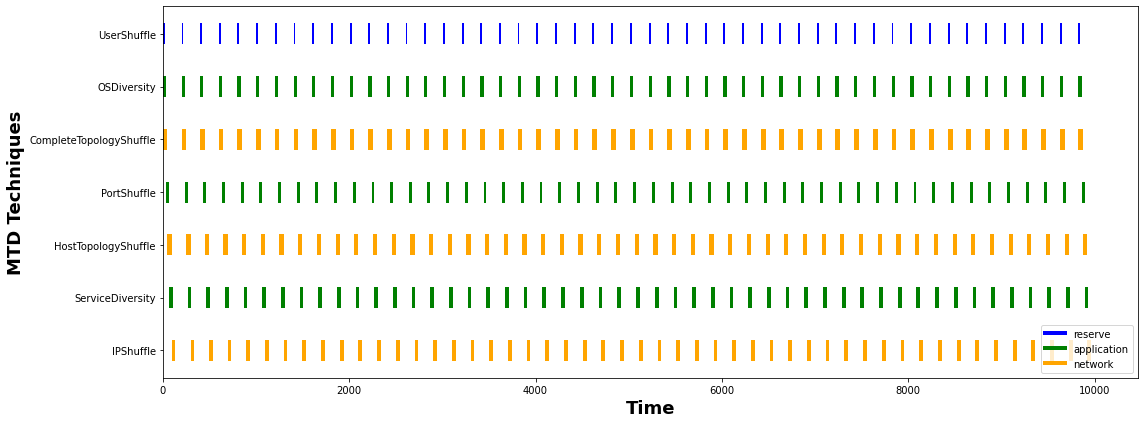

In [65]:
mtd_stats.visualise_mtd_operation(scheme=scheme)

In [66]:
attack_stats.get_record().head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,35.459330,10.459330,0,1,0,0,None,[],application,OSDiversity
3,SCAN_PORT,37.459330,50.042391,12.583061,0,1,0,0,None,[],network,CompleteTopologyShuffle
4,SCAN_HOST,52.042391,62.042391,10.000000,-1,0,0,0,None,[],None,None


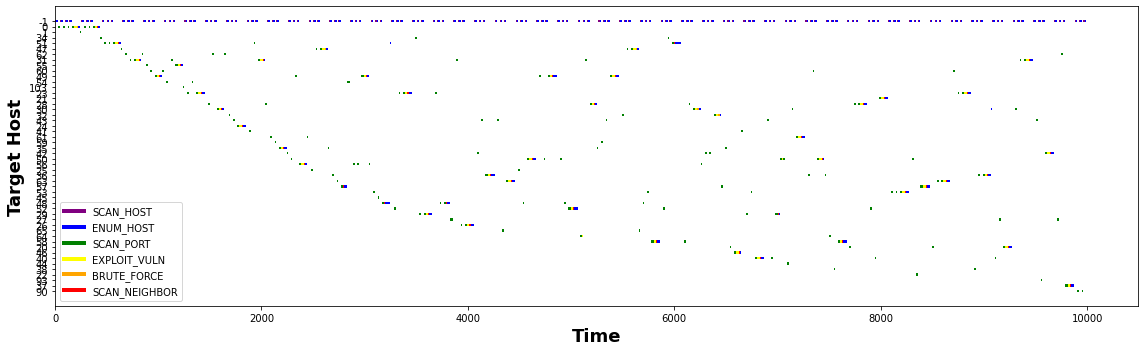

In [67]:
attack_stats.visualise_attack_operation_group_by_host()

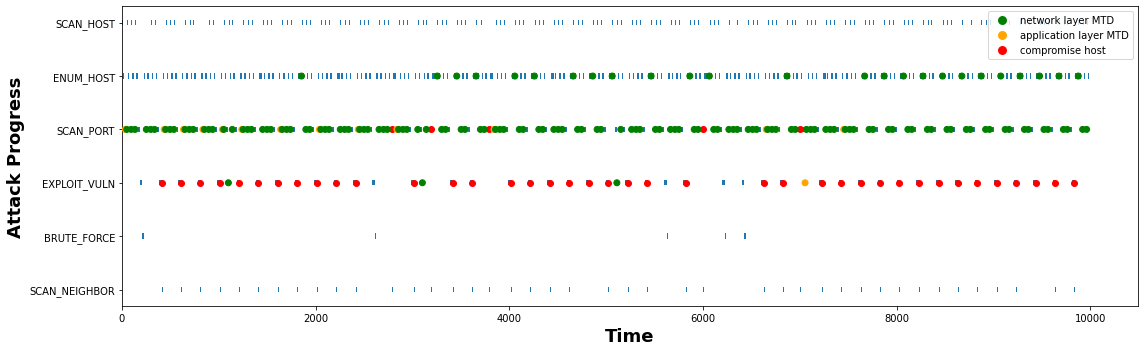

In [68]:
attack_stats.visualise_attack_operation()

In [69]:
attack_stats.compromised_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
193,SCAN_PORT,2767.959239,2787.959239,20.0,57,1,237,11,57,"[Jobi, Flori, Joceline]",None,None
221,SCAN_PORT,3169.901779,3189.901779,20.0,48,1,240,13,48,"[Carol, Brita]",None,None
263,SCAN_PORT,3769.419658,3789.419658,20.0,48,5,269,16,48,"[Bari, Deena, Cherish, Brittni]",None,None
415,SCAN_PORT,5977.199072,5997.199072,20.0,51,6,378,26,51,"[Kimberli, Carla]",None,None
483,SCAN_PORT,6980.602971,7000.602971,20.0,29,6,411,29,29,[Noel],None,None


In [70]:
attack_stats.compromised_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
26,EXPLOIT_VULN,384.581478,410.105996,25.524517,0,7,18,0,0,"[Annaliese, Agretha, Mikaela, Alicea, Babara]",None,None
40,EXPLOIT_VULN,583.763807,609.731154,25.967347,51,3,31,1,51,"[Robbin, Danyette, Michele, Jamima, Delila]",None,None
54,EXPLOIT_VULN,783.473776,810.899220,27.425444,31,2,48,2,31,"[Mureil, Gleda, Lacee, Ardella]",None,None
68,EXPLOIT_VULN,983.999376,1009.920654,25.921277,49,1,93,3,49,"[Nathalia, Carlene, Mechelle, Camille, Genovera]",None,None
83,EXPLOIT_VULN,1186.390515,1212.399970,26.009456,55,2,98,4,55,"[Brigitta, Heath, Jaclyn, Nat, Nell]",None,None
97,EXPLOIT_VULN,1384.556675,1409.723689,25.167014,23,2,117,5,23,"[Ange, Caria, Sandi, Coreen]",None,None
111,EXPLOIT_VULN,1585.610345,1611.140386,25.530041,30,1,167,6,30,"[Joelie, Jennee, Stephi, Michaella]",None,None
125,EXPLOIT_VULN,1786.944308,1812.571631,25.627323,24,1,178,7,24,"[Charmian, Doralyn, Nora, Dorise, Claudina]",None,None
139,EXPLOIT_VULN,1986.336596,2012.191229,25.854633,31,4,195,8,31,"[Mariana, Perri, Marji, Jacqui, Linea]",None,None
153,EXPLOIT_VULN,2186.493334,2211.702980,25.209646,35,1,215,9,35,"[Erena, Aridatha, Leora, Martha, Beverley]",None,None


In [71]:
attack_stats.compromised_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by


In [72]:
attack_stats.mean_time_to_compromise()

4688.877582653195